# Credit Card Fraud Detection

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(2)

Using TensorFlow backend.


## Loading the Dataset

In [40]:
data = pd.read_csv("Dataset/creditcard.csv")

## Exploratory Data Analysis

In [41]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data.drop('Amount', axis=1, inplace=True)

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [44]:
data.drop('Time', axis =1, inplace=True)

In [45]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
V1                  284807 non-null float64
V2                  284807 non-null float64
V3                  284807 non-null float64
V4                  284807 non-null float64
V5                  284807 non-null float64
V6                  284807 non-null float64
V7                  284807 non-null float64
V8                  284807 non-null float64
V9                  284807 non-null float64
V10                 284807 non-null float64
V11                 284807 non-null float64
V12                 284807 non-null float64
V13                 284807 non-null float64
V14                 284807 non-null float64
V15                 284807 non-null float64
V16                 284807 non-null float64
V17                 284807 non-null float64
V18                 284807 non-null float64
V19                 284807 non-null float64
V20                 284807 non-null float64
V21      

In [84]:
data.isnull().sum()

V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 0
V23                 0
V24                 0
V25                 0
V26                 0
V27                 0
V28                 0
Class               0
normalizedAmount    0
dtype: int64

In [46]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [47]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [48]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [49]:
type(y)

pandas.core.series.Series

In [50]:
y = pd.DataFrame(data=y)

In [51]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


## Splitting the Dataset

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [53]:
X_train.shape

(199364, 29)

In [54]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep Learning Model

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [56]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid')
    ])

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])
model.fit(X_train,y_train, epochs=5, batch_size=15)

Epoch 1/5
199364/199364 [==============================] - 18s 89us/step - loss: 0.0084 - acc: 0.9986
Epoch 2/5
199364/199364 [==============================] - 16s 80us/step - loss: 0.0041 - acc: 0.9993
Epoch 3/5
199364/199364 [==============================] - 15s 75us/step - loss: 0.0037 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 14s 71us/step - loss: 0.0038 - acc: 0.9993
Epoch 5/5
199364/199364 [==============================] - 14s 70us/step - loss: 0.0036 - acc: 0.9994


## Model Evaluation

In [24]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 1s 15us/step


In [25]:
print(score)

[0.004383969032576707, 0.999403110845827]


In [26]:
y_pred = model.predict_classes(X_test)

In [28]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [29]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

## Model Metrics

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Confusion Metrics

In [31]:
cm = confusion_matrix(y_test, y_pred)

In [32]:
cm

array([[85276,    20],
       [   31,   116]], dtype=int64)

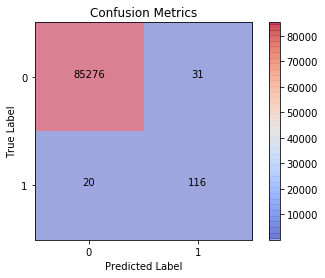

In [82]:
plt.imshow(cm, cmap='coolwarm', alpha=0.5, interpolation='nearest')
plt.yticks(np.arange(2))
plt.xticks(np.arange(2))
plt.title("Confusion Metrics")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
for i in range(2):
    for j in range(2):       
        plt.text(x=i,y=j, s=cm[i][j], horizontalalignment="center")

### Accuracy

In [34]:
ac = accuracy_score(y_test, y_pred)

In [35]:
ac

0.999403110845827

### Classification Report

In [37]:
cl = classification_report(y_test, y_pred)

In [39]:
print(cl)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.79      0.82       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



## Predicting on whole Dataset

In [96]:
y_pred_final = model.predict(X)

In [98]:
y_pred_final.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [99]:
cm2 = confusion_matrix(y,y_pred_final.round())
cm2

array([[284250,     65],
       [   100,    392]], dtype=int64)

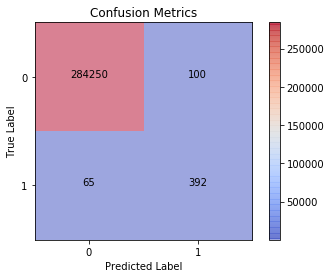

In [100]:
plt.imshow(cm2, cmap='coolwarm', alpha=0.5, interpolation='nearest')
plt.yticks(np.arange(2))
plt.xticks(np.arange(2))
plt.title("Confusion Metrics")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
for i in range(2):
    for j in range(2):       
        plt.text(x=i,y=j, s=cm2[i][j], horizontalalignment="center")

## Trying it with Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rc = RandomForestClassifier(n_estimators=100)

In [103]:
rc.fit(X_train, y_train)

C:\Users\Satinder\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
y_pred2 = rc.predict(X_test)

In [106]:
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
cm3 = confusion_matrix(y_test, y_pred2)
cm3

array([[85289,     7],
       [   36,   111]], dtype=int64)

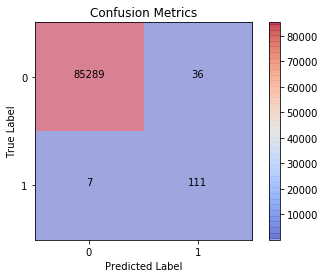

In [112]:
plt.imshow(cm3, cmap='coolwarm', alpha=0.5, interpolation='nearest')
plt.yticks(np.arange(2))
plt.xticks(np.arange(2))
plt.title("Confusion Metrics")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
for i in range(2):
    for j in range(2):       
        plt.text(x=i,y=j, s=cm3[i][j], horizontalalignment="center")

In [108]:
y_pred_final2 = rc.predict(X)

In [109]:
y_pred_final2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
cm4 = confusion_matrix(y, y_pred_final2)
cm4

array([[284308,      7],
       [    36,    456]], dtype=int64)

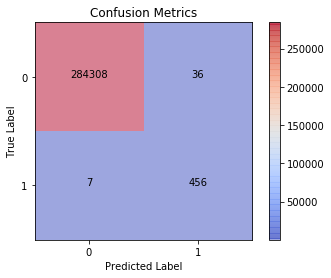

In [111]:
plt.imshow(cm4, cmap='coolwarm', alpha=0.5, interpolation='nearest')
plt.yticks(np.arange(2))
plt.xticks(np.arange(2))
plt.title("Confusion Metrics")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
for i in range(2):
    for j in range(2):       
        plt.text(x=i,y=j, s=cm4[i][j], horizontalalignment="center")

### So we found out that our Random Forest Model performs better than our deep learning model